### Test efficient calculation of information entropy with masked arrays

In [1]:
# Step 1: load previously calculated results

In [7]:
import pickle
import numpy as np

In [8]:
ua = pickle.load(open("gipps_results.pkl"))

In [9]:
# cast probabilities into numpy array
ua.p_block = np.array(ua.p_block)

In [14]:
def ie_standard(ua):
    # test standard way to calculate information entropy with nested blocks:
    # calculate information entropy and store in self.e_block
    e_block = np.zeros_like(ua.p_block[1])
    for p_block in ua.p_block:
        for i in range(ua.nx):
            for j in range(ua.ny):
                for k in range(ua.nz):
                    if p_block[i, j, k] > 0:
                        e_block[i, j, k] -= p_block[i, j, k] * np.log2(p_block[i, j, k])
    return e_block

In [79]:
%%timeit
e_block_1 = ie_standard(ua)

1 loops, best of 3: 32.8 s per loop


In [16]:
# now test implementation with masked arrays

In [51]:
def ie_masked(ua):
    pm = np.ma.masked_equal(ua.p_block, 0)
    pm2 = - pm * np.ma.log2(pm)
    ie_masked = np.sum(pm2.filled(0), axis = 0)
    return ie_masked

In [80]:
%%timeit
e_block_2 = ie_masked(ua)

1 loops, best of 3: 2.69 s per loop


In [68]:
# Check if result is correct
assert((e_block_1.all() == e_block_2.all()))

In [71]:
import matplotlib.pyplot as plt

In [72]:
%matplotlib inline

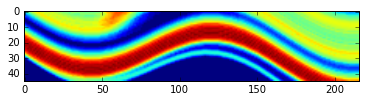

In [77]:
plt.imshow(e_block_1[100,:,:].transpose())

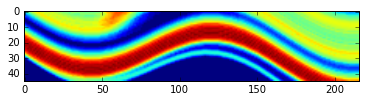

In [78]:
plt.imshow(e_block_2[100,:,:].transpose())


In [46]:
np.max(ie_masked)

3.2090368361692407

In [81]:
75 * 75

5625

In [82]:
(1 * 0.05 - 1.0)**2 * 5625

5076.5625

In [ ]:
print ua